In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from census import Census
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import requests


import plotly.plotly as py
import plotly.graph_objs as go

# Census API Key
from config import api_key
c = Census(api_key, year = 2013)


In [2]:
# Store filepath in a variable
gun_file = "Resources/gun-violence-data_01-2013_03-2018.csv"

In [3]:
# Read our data file with the pandas library
gun_file_df = pd.read_csv(gun_file)
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
# Create a new series for just the year
gun_file_df["year"] = pd.DatetimeIndex(gun_file_df["date"]).year
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013


In [5]:
# Group dataframe by state
grouped_states = gun_file_df.groupby(["state"])
number_of_incidents = grouped_states.count()
incidents = number_of_incidents["incident_id"]
incidents.head()

state
Alabama        5471
Alaska         1349
Arizona        2328
Arkansas       2842
California    16306
Name: incident_id, dtype: int64

In [6]:
# Find the total number killed by state
sum_of_deaths = grouped_states["n_killed"].sum()
sum_of_deaths.head()

state
Alabama       1880
Alaska         267
Arizona       1094
Arkansas       773
California    5562
Name: n_killed, dtype: int64

In [7]:
# Create a new dataframe
state_summary = pd.DataFrame({"Number of Incidents" : incidents,
                             "Number of Deaths" : sum_of_deaths})
#state_summary = state_summary.reset_index(drop=True)
state_summary.head()

,Number of Deaths,Number of Incidents
state,,
Alabama,1880,5471
Alaska,267,1349
Arizona,1094,2328
Arkansas,773,2842
California,5562,16306


In [8]:
# Add state as a column
state_summary["State_Name"] = state_summary.index
state_summary.head()

# Reset index
state_summary = state_summary.reset_index(drop=True)
state_summary.head()

,Number of Deaths,Number of Incidents,State_Name
0,1880,5471,Alabama
1,267,1349,Alaska
2,1094,2328,Arizona
3,773,2842,Arkansas
4,5562,16306,California


In [9]:
# Look at gun violence over time to show there is a need to study this
# Group dataframe by year

grouped_years = gun_file_df.groupby(["year"])
incidents_in_years = grouped_years.count()
incidents_years = incidents_in_years["incident_id"]
incidents_years



year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: incident_id, dtype: int64

In [10]:
# Find the total number killed by year
sum_of_deaths_year = grouped_years["n_killed"].sum()
sum_of_deaths_year

year
2013      317
2014    12557
2015    13484
2016    15066
2017    15511
2018     3533
Name: n_killed, dtype: int64

In [11]:
# Create a new dataframe with years
year_df = pd.DataFrame({
                        "Number of Incidents" : incidents_years,
                        "Number of Deaths": sum_of_deaths_year})
year_df

,Number of Deaths,Number of Incidents
year,,
2013,317,278
2014,12557,51854
2015,13484,53579
2016,15066,58763
2017,15511,61401
2018,3533,13802


In [12]:
# Add year as a column
year_df["Year"] = year_df.index
year_df

# Reset index
year_df = year_df.reset_index(drop=True)
year_df

,Number of Deaths,Number of Incidents,Year
0,317,278,2013
1,12557,51854,2014
2,13484,53579,2015
3,15066,58763,2016
4,15511,61401,2017
5,3533,13802,2018


In [13]:
# Drop 2013 and 2018 for the purpose of the line graph
only_few_years = year_df.drop([0,5])
only_few_years

,Number of Deaths,Number of Incidents,Year
1,12557,51854,2014
2,13484,53579,2015
3,15066,58763,2016
4,15511,61401,2017


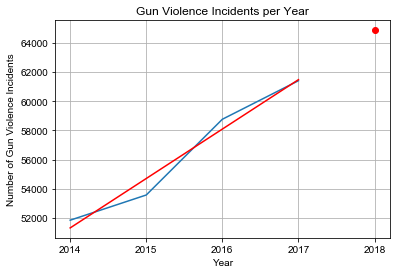

In [14]:
# Create a line plot for number of incidents by year
x_axis = only_few_years["Year"]
y_axis_incidents = only_few_years["Number of Incidents"]


# Format the graph
plt.xticks(np.arange(min(x_axis), max(x_axis)+2, 1.0))
plt.xlabel("Year")
plt.ylabel("Number of Gun Violence Incidents")
plt.title("Gun Violence Incidents per Year")
plt.plot(x_axis, y_axis_incidents)

# New x to include 2018
new_x = ["2014", "2015", "2016", "2017", "2018"]

# Use regression line to predict the number of incidents in 2018
(slope, intercept, _, _, _) = linregress(x_axis, y_axis_incidents)
fit = slope * x_axis + intercept

# 2018
x = 2018
y = slope * x + intercept
plt.plot(x, y, 'red', marker = 'o')

plt.plot(x_axis, fit, 'r')
plt.grid(True)

sns.set_style("whitegrid")
plt.savefig("GunIncidentsperYear.png")


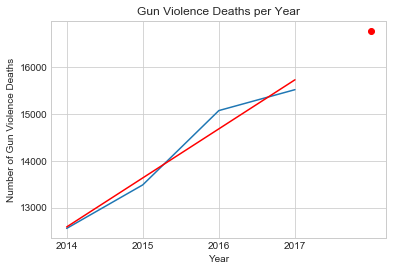

In [15]:
# Create a line plot for deaths by year
# Include 2018 in
x_axis = only_few_years["Year"]
y_axis_deaths = only_few_years["Number of Deaths"]

# Format the graph
plt.xticks(np.arange(min(x_axis), max(x_axis) + 1, 1.0))
plt.xlabel("Year")
plt.ylabel("Number of Gun Violence Deaths")
plt.title("Gun Violence Deaths per Year")
plt.plot(x_axis, y_axis_deaths)
sns.set_style("whitegrid")

# Use regression line to predict the number of incidents in 2018
# x_axis that includes 2018
# We can extrapolate our current 2018 data 
(slope, intercept, _, _, _) = linregress(x_axis, y_axis_deaths)
fit = slope * x_axis + intercept
plt.plot(x_axis, fit, 'r')

# 2018
x = 2018
y = slope * x + intercept
plt.plot(x, y, 'red', marker = 'o')

# Show Graph
plt.grid(True)

# Save 
plt.savefig("GunViolenceDeathsperYear.png")


In [18]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "State_Name"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State_Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [19]:
# Merge data frames on state (state_summary) and (census_pd)
merge_summary_census = pd.merge(state_summary, census_pd, on = "State_Name")
merge_summary_census.head()


,Number of Deaths,Number of Incidents,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,1880,5471,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,267,1349,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,1094,2328,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,773,2842,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,5562,16306,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [20]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)

In [21]:
# Store filepath in a variable
gun_law = "Resources/Gun Law Strictness.xlsx"
gun_school = "Resources/Total School Expenditures by State.xlsx"
gun_mental = "Resources/Mental Health Expenditure by State.xlsx"
gun_raw = "Resources/raw_data.xlsx"
state_geocode = "Resources/us_states_geo_center.xlsx"
#gun_violence="Resources/gun-violence-data.csv"

In [22]:
# Read our data file with the pandas library
gun_law_df = pd.read_excel(gun_law)
gun_school_df = pd.read_excel(gun_school)
gun_mental_df = pd.read_excel(gun_mental)
gun_raw_df = pd.read_excel(gun_raw)
state_geo = pd.read_excel(state_geocode)
#gun_violence_df = pd.read_csv(gun_violence)

gun_mental_df.head()

,state,tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,373100000,78.19,37,327.57,40
1,Alaska,214200700,310.01,3,1785.01,2
2,Arizona,1414300000,221.27,7,827.56,15
3,Arkansas,122468795,42.02,48,169.39,50
4,California,5674396088,152.60,15,645.55,22


In [23]:
# Rename state to State_Name
gun_mental_df.rename(columns={'state' : 'State_Name'}, inplace = True)
gun_mental_df.head()

,State_Name,tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,373100000,78.19,37,327.57,40
1,Alaska,214200700,310.01,3,1785.01,2
2,Arizona,1414300000,221.27,7,827.56,15
3,Arkansas,122468795,42.02,48,169.39,50
4,California,5674396088,152.60,15,645.55,22


In [24]:
gun_law_df.head()

,gun law strengh (rank),state,grade (2017),gun death rate (rank),gun death rate (rank per 100k)
0,1,California,A,43,7.9
1,2,New Jersey,A-,45,5.5
2,3,Connecticut,A-,46,4.6
3,4,Massachusetts,A-,50,3.4
4,5,New York,A-,48,4.4


In [25]:
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013


In [26]:
gun_file_df["month"] = pd.DatetimeIndex(gun_file_df["date"]).month
gun_file_df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1
5,478948,1/7/13,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,2013,1
6,479363,1/19/13,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,2013,1
7,479374,1/21/13,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,2013,1
8,479389,1/21/13,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3

In [27]:
gun_file_df["year"] = pd.DatetimeIndex(gun_file_df["date"]).year
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1


In [30]:
gun_file_df["month"] = pd.DatetimeIndex(gun_file_df["date"]).month
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1


In [31]:
#Keep all data except the ones referent to the 2013 year, since this year has incomplete information. Then, reset index.#Keep all 
gun_file_df = gun_file_df[gun_file_df.year != 2013]
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
278,95289,1/1/14,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,0::Female,NaN,NaN,0::Unharmed,0::Victim,http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1
279,92401,1/1/14,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,NaN,NaN,NaN,NaN,NaN,http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1
280,92383,1/1/14,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,0::Male||1::Male,0::Julio Mora||1::Sheldon Smith,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1
281,92142,1/1/14,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,0::Male||1::Male,NaN,NaN,0::Injured,0::Victim||1::Subject-Suspect,http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1
282,95261,1/1/14,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,0::Female,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1


In [32]:
gun_file_df  = gun_file_df.reset_index(drop=True)
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
0,95289,1/1/14,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,0::Female,NaN,NaN,0::Unharmed,0::Victim,http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1
1,92401,1/1/14,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,NaN,NaN,NaN,NaN,NaN,http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1
2,92383,1/1/14,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,0::Male||1::Male,0::Julio Mora||1::Sheldon Smith,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1
3,92142,1/1/14,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,0::Male||1::Male,NaN,NaN,0::Injured,0::Victim||1::Subject-Suspect,http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1
4,95261,1/1/14,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,0::Female,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1


In [33]:
gun_file_df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'year', 'month'],
      dtype='object')

In [34]:
len(gun_file_df)

239399

In [35]:
len(gun_file_df['month'])

239399

In [36]:
gun_file_df.to_csv("gun_file_df.csv")

In [37]:
#Create a loop to change months into seasons
#summer: 6, 7, 8
#fall: 9, 10, 11
#winter: 12, 1, 2
#spring: 3, 4, 5

season=[]

for x in gun_file_df["month"]:
    if x == 12 or x == 1 or x == 2:
        season.append("winter")
    elif x == 3 or x == 4 or x == 5:
        season.append("spring")
    elif x == 6 or x == 7 or x == 8:
        season.append("summer")
    else: 
        season.append("fall")

In [38]:
# Create a column from the list and add to gun_law_df
gun_file_df["Season"] = season
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,Season
0,95289,1/1/14,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,NaN,NaN,0::Unharmed,0::Victim,http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1,winter
1,92401,1/1/14,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,NaN,NaN,NaN,NaN,http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1,winter
2,92383,1/1/14,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,0::Julio Mora||1::Sheldon Smith,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1,winter
3,92142,1/1/14,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,NaN,NaN,0::Injured,0::Victim||1::Subject-Suspect,http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1,winter
4,95261,1/1/14,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1,winter


In [39]:
#Drop 2018 to plot Season ( since 2018 season are in progress)
gun_file_season = gun_file_df[gun_file_df.year != 2018]
len(gun_file_season)

225597

In [40]:
#Incidents Group by season:#Incident 
grouped_season = gun_file_season.groupby(["Season"])
number_of_incidents = grouped_season.count()
season_incidents = number_of_incidents["incident_id"]
season_incidents

Season
fall      57447
spring    56383
summer    60828
winter    50939
Name: incident_id, dtype: int64

In [41]:
#Incidents Group by season:
season_deaths = grouped_season["n_killed"].sum()
season_deaths

Season
fall      14329
spring    13665
summer    15198
winter    13426
Name: n_killed, dtype: int64

In [42]:
# Create a new dataframe
season_summary = pd.DataFrame({"Season Incidents" : season_incidents,
                             "Season Deaths" : season_deaths
                             })
season_summary

,Season Deaths,Season Incidents
Season,,
fall,14329,57447
spring,13665,56383
summer,15198,60828
winter,13426,50939


In [43]:
# Add season as a column
season_summary["Season"] = season_summary.index
season_summary.head()

# Reset index
season_summary = season_summary.reset_index(drop=True)
season_summary.head()

,Season Deaths,Season Incidents,Season
0,14329,57447,fall
1,13665,56383,spring
2,15198,60828,summer
3,13426,50939,winter


In [45]:
import plotly
plotly.tools.set_credentials_file(username='pvirgilio', api_key='KdeHIchH9RtyP6zFr6Fh')

In [46]:
import plotly.plotly as py

In [47]:
trace1 =  go.Bar(
         x=season_summary ['Season'],
    y=season_summary ['Season Deaths'],
    name='Season Deaths'
)
trace2 = go.Bar(
    x=season_summary ['Season'],
    y=season_summary ['Season Incidents'],
    name='Season Incidents'
)

data = [trace1, trace2]
layout = go.Layout(
    title='Firearm Incidents / Deaths per Season in the U.S. 2014-2017',
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [48]:
# Create a for loop to just pull the letter with + or -
just_letter = []

for row in gun_law_df["grade (2017)"]:
    if row == "A" or row ==  "A+" or row == "A-":
        just_letter.append("A")
    elif row == "B" or row == "B+" or row == "B-":
        just_letter.append("B")
    elif row == "C" or row == "C+" or row == "C-":
        just_letter.append("C")
    elif row == "D" or row == "D+" or row == "D-":
        just_letter.append("D")
    else:
        just_letter.append("F")

# Create a column from the list and add to gun_law_df
gun_law_df["Letter_Grade"] = just_letter
gun_law_df.head()

,gun law strengh (rank),state,grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,1,California,A,43,7.9,A
1,2,New Jersey,A-,45,5.5,A
2,3,Connecticut,A-,46,4.6,A
3,4,Massachusetts,A-,50,3.4,A
4,5,New York,A-,48,4.4,A


In [49]:
state_geo.head()

,State_Name,Location,lat (N),lng (W)
0,Alabama,12.1 mi (19.5 km) southwest of Clanton,32.7794,-86.8287
1,Alaska,77.9 mi (125.4 km) northwest of Denali,64.0685,152.2782
2,Arizona,49.7 mi (80.0 km) east-southeast of Prescott,34.2744,-111.6602
3,Arkansas,14.2 mi (22.9 km) northwest of Little Rock,34.8938,-92.4426
4,California,"36 mi (58 km) northeast of Madera,",37.1841,-119.4696


In [50]:
# Rename state to State_Name
gun_law_df.rename(columns={'state' : 'State_Name'}, inplace = True)
gun_law_df.head()

,gun law strengh (rank),State_Name,grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,1,California,A,43,7.9,A
1,2,New Jersey,A-,45,5.5,A
2,3,Connecticut,A-,46,4.6,A
3,4,Massachusetts,A-,50,3.4,A
4,5,New York,A-,48,4.4,A


In [51]:
# Merge merge_summary_census
merge_census_law = pd.merge(merge_summary_census, gun_law_df, on = "State_Name")
merge_census_law.head()


,Number of Deaths,Number of Incidents,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,1880,5471,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,36,F,2,21.4,F
1,267,1349,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,44,F,1,23.0,F
2,1094,2328,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,47,F,16,15.2,F
3,773,2842,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,39,F,9,17.7,F
4,5562,16306,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,1,A,43,7.9,A


In [52]:
# Rename state to State_Name
gun_school_df.rename(columns={'state' : 'State_Name'}, inplace = True)
gun_school_df.head()

,State_Name,total_spending,total_per_pupil
0,Alabama,6826622000,9128
1,Alaska,2646225000,20172
2,Arizona,7205417000,7489
3,Arkansas,4683434000,9694
4,California,66208111000,10467


In [53]:
# Rename state to State_Name
gun_raw_df.rename(columns={'state' : 'State_Name'}, inplace = True)
gun_raw_df.head()

,State_Name,year,lawtotal
0,Alabama,2017,10
1,Alaska,2017,4
2,Arizona,2017,11
3,Arkansas,2017,11
4,California,2017,106


In [54]:
merge1 = gun_raw_df.merge(gun_school_df, how='outer', on='State_Name')
merge1.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil
0,Alabama,2017.0,10.0,6826622000,9128
1,Alaska,2017.0,4.0,2646225000,20172
2,Arizona,2017.0,11.0,7205417000,7489
3,Arkansas,2017.0,11.0,4683434000,9694
4,California,2017.0,106.0,66208111000,10467


In [55]:
merge2 = merge1.merge(gun_law_df, how='outer', on='State_Name')
merge2.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,Alabama,2017.0,10.0,6826622000,9128,36.0,F,2.0,21.4,F
1,Alaska,2017.0,4.0,2646225000,20172,44.0,F,1.0,23.0,F
2,Arizona,2017.0,11.0,7205417000,7489,47.0,F,16.0,15.2,F
3,Arkansas,2017.0,11.0,4683434000,9694,39.0,F,9.0,17.7,F
4,California,2017.0,106.0,66208111000,10467,1.0,A,43.0,7.9,A


In [56]:
gun_dataframe = merge2.merge(gun_mental_df, how = "outer", on = "State_Name")
gun_dataframe.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,2017.0,10.0,6826622000,9128,36.0,F,2.0,21.4,F,373100000,78.19,37,327.57,40
1,Alaska,2017.0,4.0,2646225000,20172,44.0,F,1.0,23.0,F,214200700,310.01,3,1785.01,2
2,Arizona,2017.0,11.0,7205417000,7489,47.0,F,16.0,15.2,F,1414300000,221.27,7,827.56,15
3,Arkansas,2017.0,11.0,4683434000,9694,39.0,F,9.0,17.7,F,122468795,42.02,48,169.39,50
4,California,2017.0,106.0,66208111000,10467,1.0,A,43.0,7.9,A,5674396088,152.60,15,645.55,22


In [57]:
gun_census_df = gun_dataframe.merge(census_pd, how='outer', on='State_Name')
gun_census_df.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,37.0,327.57,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,3.0,1785.01,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,7.0,827.56,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,48.0,169.39,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,15.0,645.55,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [58]:
gun_census = gun_census_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
gun_census.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,37.0,327.57,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,3.0,1785.01,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,7.0,827.56,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,48.0,169.39,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,15.0,645.55,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [59]:
# Merge gun_census with state_summary on State_Name
gun_census_deaths = gun_census.merge(state_summary, how = 'outer', on = 'State_Name')
gun_census_deaths.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Number of Deaths,Number of Incidents
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,1880,5471
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,267,1349
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,1094,2328
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,773,2842
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,5562,16306


In [60]:
# Drop DC because we don't have a lot of data for it
gun_census_deaths.drop([50])
gun_census_deaths["Pop in 100k"] = gun_census_deaths["Population"]/100000
gun_census_deaths["Norm Incidents"] = gun_census_deaths["Number of Incidents"]/gun_census_deaths["Pop in 100k"]

In [61]:
#add info on mental health spending per state

gun_dataframe = merge2.merge(gun_mental_df, how='outer', on='State_Name')


gun_dataframe.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,2017.0,10.0,6826622000,9128,36.0,F,2.0,21.4,F,373100000,78.19,37,327.57,40
1,Alaska,2017.0,4.0,2646225000,20172,44.0,F,1.0,23.0,F,214200700,310.01,3,1785.01,2
2,Arizona,2017.0,11.0,7205417000,7489,47.0,F,16.0,15.2,F,1414300000,221.27,7,827.56,15
3,Arkansas,2017.0,11.0,4683434000,9694,39.0,F,9.0,17.7,F,122468795,42.02,48,169.39,50
4,California,2017.0,106.0,66208111000,10467,1.0,A,43.0,7.9,A,5674396088,152.60,15,645.55,22


In [62]:
#Add Census information
gundata_census_df = gun_dataframe.merge(census_pd, how='outer', on='State_Name')
gundata_census_df.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,37.0,327.57,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,3.0,1785.01,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,7.0,827.56,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,48.0,169.39,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,15.0,645.55,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [63]:
#Add lat and long for each state geo center location 
gun_census = gundata_census_df.merge(state_geo, how='outer', on='State_Name')
gun_census.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Location,lat (N),lng (W)
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,12.1 mi (19.5 km) southwest of Clanton,32.7794,-86.8287
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,77.9 mi (125.4 km) northwest of Denali,64.0685,152.2782
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,49.7 mi (80.0 km) east-southeast of Prescott,34.2744,-111.6602
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,14.2 mi (22.9 km) northwest of Little Rock,34.8938,-92.4426
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,"36 mi (58 km) northeast of Madera,",37.1841,-119.4696


In [64]:
gun_final = gun_census.merge(state_summary, how='outer', on='State_Name')
gun_final

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Location,lat (N),lng (W),Number of Deaths,Number of Incidents
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,43253.0,23680.0,870631.0,18.140878,5.040968,12.1 mi (19.5 km) southwest of Clanton,32.7794,-86.8287,1880.0,5471.0
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,70760.0,32651.0,69514.0,9.650487,4.572854,77.9 mi (125.4 km) northwest of Denali,64.0685,152.2782,267.0,1349.0
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,49774.0,25358.0,1131901.0,17.468409,4.882323,49.7 mi (80.0 km) east-southeast of Prescott,34.2744,-111.6602,1094.0,2328.0
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,40768.0,22170.0,547328.0,18.658682,4.132961,14.2 mi (22.9 km) northwest of Little Rock,34.8938,-92.4426,773.0,2842.0
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,61094.0,29527.0,5885417.0,15.628107,5.758662,"36 mi (58 km) northeast of Madera,",37.1841,-119.4696,5562.0,16306.0
5,Colorado,2017.0,30.0,8.146683e+09,9245.0,15.0,C,20.0,14.3,C,...,58433.0,31109.0,660874.0,12.909387,4.526785,"29.2 mi (47.0 km) northwest of Pikes Peak,",38.9972,-105.5478,796.0,3201.0
6,Connecticut,2017.0,89.0,9.603117e+09,18377.0,3.0,A-,46.0,4.6,A,...,69461.0,37892.0,354348.0,9.888153,5.321774,1.1 mi (1.8 km) east of East Berlin,41.6219,-72.7273,341.0,3067.0
7,Delaware,2017.0,40.0,1.779087e+09,14120.0,11.0,B,37.0,10.9,B,...,59878.0,29819.0,103633.0,11.407723,4.535988,11.7 mi (18.8 km) south of Dover,38.9896,-75.5050,217.0,1685.0
8,Florida,2017.0,21.0,2.493343e+10,8881.0,26.0,F,26.0,12.6,F,...,46956.0,26236.0,3052807.0,15.990687,5.741025,5.8 mi (9.3 km) northwest of Brooksville,28.6305,-82.4497,3909.0,15029.0
9,Georgia,2017.0,6.0,1.640183e+10,9427.0,32.0,F,17.0,14.9,F,...,49179.0,25182.0,1736680.0,17.702408,5.553301,17.7 mi (28.5 km) southeast of Macon,32.6415,-83.4426,2456.0,8925.0


In [65]:
#Check all columns names, rename colums, add State_Code
gun_final.columns

Index(['State_Name', 'year', 'lawtotal', 'total_spending', 'total_per_pupil',
       'gun law strengh (rank)', 'grade (2017)', 'gun death rate (rank)',
       'gun death rate (rank per 100k)', 'Letter_Grade', 'tota_expenditure',
       'expenditure_per_capita', 'per_capita_rank',
       'poverty_per_capita_expenditure', 'poverty_per_capita_rank',
       'Population', 'Median Age', 'Household Income', 'Per Capita Income',
       'Poverty Count', 'Poverty Rate', 'Unemployment Rate', 'Location',
       'lat (N)', 'lng (W)', 'Number of Deaths', 'Number of Incidents'],
      dtype='object')

In [66]:

# Using .rename(columns={}) in order to rename columns# Using . 
renamed_gun_df = gun_final.rename(columns={"lawtotal":"Number_of_Laws", "gun death rate (rank)":"Rank_Number_Death", "gun death rate (rank per 100k)": "Rank_Number_Death_per_100k","total_spending":"Education_Investment", "gun law strengh (rank)":"Rank_Law_Strenght", "tota_expenditure":"Mental_Health_Investment"})
renamed_gun_df.columns

Index(['State_Name', 'year', 'Number_of_Laws', 'Education_Investment',
       'total_per_pupil', 'Rank_Law_Strenght', 'grade (2017)',
       'Rank_Number_Death', 'Rank_Number_Death_per_100k', 'Letter_Grade',
       'Mental_Health_Investment', 'expenditure_per_capita', 'per_capita_rank',
       'poverty_per_capita_expenditure', 'poverty_per_capita_rank',
       'Population', 'Median Age', 'Household Income', 'Per Capita Income',
       'Poverty Count', 'Poverty Rate', 'Unemployment Rate', 'Location',
       'lat (N)', 'lng (W)', 'Number of Deaths', 'Number of Incidents'],
      dtype='object')

In [67]:
# Drop DC because we don't have enough information for it
one_renamed = renamed_gun_df[renamed_gun_df.State_Name !='District of Columbia']

In [68]:
# Drop Puerto Rico because we don't have enough information for it
two_renamed = one_renamed[one_renamed.State_Name !='Puerto Rico']


In [69]:
two_renamed['code']='AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
two_renamed.head()

#Save full dataframe to csv
two_renamed.to_csv("Resources\gun_dataframe.csv")

/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [70]:
#Create smaller dataframe to use plot maps. Add Normalized Values to df
plotly_gun_df = two_renamed[['State_Name', 'code', 'lat (N)', 'lng (W)','Population', 'Number of Deaths', 'Number of Incidents']]
plotly_gun_df.head()

,State_Name,code,lat (N),lng (W),Population,Number of Deaths,Number of Incidents
0,Alabama,AL,32.7794,-86.8287,4799277.0,1880.0,5471.0
1,Alaska,AK,64.0685,152.2782,720316.0,267.0,1349.0
2,Arizona,AZ,34.2744,-111.6602,6479703.0,1094.0,2328.0
3,Arkansas,AR,34.8938,-92.4426,2933369.0,773.0,2842.0
4,California,CA,37.1841,-119.4696,37659181.0,5562.0,16306.0


In [71]:
normalized_death = round(plotly_gun_df['Number of Deaths']/plotly_gun_df['Population']*100000,2)
normalized_death.head()

0    39.17
1    37.07
2    16.88
3    26.35
4    14.77
dtype: float64

In [72]:
normalized_incidents = round(plotly_gun_df['Number of Incidents']/plotly_gun_df['Population']*100000,2)
normalized_incidents.head()

0    114.00
1    187.28
2     35.93
3     96.89
4     43.30
dtype: float64

In [73]:
plotly_gun_df["Norm Incidents"] = normalized_incidents
plotly_gun_df["Norm Deaths"] = normalized_death

plotly_gun_df

/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,State_Name,code,lat (N),lng (W),Population,Number of Deaths,Number of Incidents,Norm Incidents,Norm Deaths
0,Alabama,AL,32.7794,-86.8287,4799277.0,1880.0,5471.0,114.00,39.17
1,Alaska,AK,64.0685,152.2782,720316.0,267.0,1349.0,187.28,37.07
2,Arizona,AZ,34.2744,-111.6602,6479703.0,1094.0,2328.0,35.93,16.88
3,Arkansas,AR,34.8938,-92.4426,2933369.0,773.0,2842.0,96.89,26.35
4,California,CA,37.1841,-119.4696,37659181.0,5562.0,16306.0,43.30,14.77
5,Colorado,CO,38.9972,-105.5478,5119329.0,796.0,3201.0,62.53,15.55
6,Connecticut,CT,41.6219,-72.7273,3583561.0,341.0,3067.0,85.59,9.52
7,Delaware,DE,38.9896,-75.5050,908446.0,217.0,1685.0,185.48,23.89
8,Florida,FL,28.6305,-82.4497,19091156.0,3909.0,15029.0,78.72,20.48
9,Georgia,GA,32.6415,-83.4426,9810417.0,2456.0,8925.0,90.97,25.03


In [74]:
sorted_df = plotly_gun_df.sort_values("Number of Incidents", ascending=False)
sorted_df

,State_Name,code,lat (N),lng (W),Population,Number of Deaths,Number of Incidents,Norm Incidents,Norm Deaths
12,Illinois,IL,40.0417,-89.1965,12848554.0,3409.0,17556.0,136.64,26.53
4,California,CA,37.1841,-119.4696,37659181.0,5562.0,16306.0,43.30,14.77
8,Florida,FL,28.6305,-82.4497,19091156.0,3909.0,15029.0,78.72,20.48
42,Texas,TX,31.4757,-99.3312,25639373.0,5046.0,13577.0,52.95,19.68
34,Ohio,OH,40.2862,-82.7937,11549590.0,2508.0,10244.0,88.70,21.72
31,New York,NY,42.9538,-75.5268,19487053.0,1705.0,9712.0,49.84,8.75
37,Pennsylvania,PA,40.8781,-77.7996,12731381.0,2395.0,8929.0,70.13,18.81
9,Georgia,GA,32.6415,-83.4426,9810417.0,2456.0,8925.0,90.97,25.03
32,North Carolina,NC,35.5557,-79.3877,9651380.0,2225.0,8739.0,90.55,23.05
17,Louisiana,LA,31.0689,-91.9968,4567968.0,2179.0,8103.0,177.39,47.70


In [75]:
sorted_norm_df = plotly_gun_df.sort_values("Norm Incidents", ascending=False)
sorted_norm_df

,State_Name,code,lat (N),lng (W),Population,Number of Deaths,Number of Incidents,Norm Incidents,Norm Deaths
1,Alaska,AK,64.0685,152.2782,720316.0,267.0,1349.0,187.28,37.07
7,Delaware,DE,38.9896,-75.5050,908446.0,217.0,1685.0,185.48,23.89
17,Louisiana,LA,31.0689,-91.9968,4567968.0,2179.0,8103.0,177.39,47.70
39,South Carolina,SC,33.9169,-80.8964,4679602.0,1610.0,6939.0,148.28,34.40
12,Illinois,IL,40.0417,-89.1965,12848554.0,3409.0,17556.0,136.64,26.53
23,Mississippi,MS,32.7364,-89.6678,2976872.0,1176.0,3599.0,120.90,39.50
41,Tennessee,TN,35.8580,-86.3505,6402387.0,1824.0,7626.0,119.11,28.49
0,Alabama,AL,32.7794,-86.8287,4799277.0,1880.0,5471.0,114.00,39.17
24,Missouri,MO,38.3566,-92.4580,6007182.0,2136.0,6631.0,110.38,35.56
19,Maryland,MD,39.0550,-76.7909,5834299.0,1691.0,5798.0,99.38,28.98


In [76]:
plotly_gun_df.to_csv("Resources\plotly_gun.csv")

In [77]:
random_x = np.array(plotly_gun_df["Population"])
random_y = plotly_gun_df["Number of Incidents"]

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

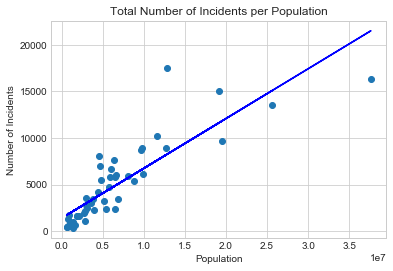

In [78]:
#population vs gun incidents 

x_axis = np.array(plotly_gun_df["Population"])
y_axis = plotly_gun_df["Number of Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()

plt.title("Total Number of Incidents per Population")
ax.set_xlabel("Population")
ax.set_ylabel("Number of Incidents")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

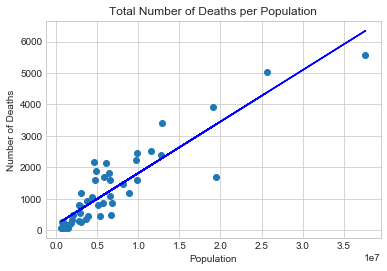

In [79]:

#population vs gun deaths #populati 

x_axis = np.array(plotly_gun_df["Population"])
y_axis = plotly_gun_df["Number of Deaths"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()

plt.title("Total Number of Deaths per Population")
ax.set_xlabel("Population")
ax.set_ylabel("Number of Deaths")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

In [109]:
import plotly
plotly.tools.set_credentials_file(username='pvirgilio', api_key='KdeHIchH9RtyP6zFr6Fh')

In [83]:
plotly_gun_df.columns

Index(['State_Name', 'code', 'lat (N)', 'lng (W)', 'Population',
       'Number of Deaths', 'Number of Incidents', 'Norm Incidents',
       'Norm Deaths'],
      dtype='object')

In [84]:
df = plotly_gun_df

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State_Name'] + ' Number of Deaths '+df['Number of Deaths']+' Normalized Death '+df['Norm Deaths']


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = df['code'],
        z = df['Norm Deaths'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "# Lives lost per 100k")
        ) ]

layout = dict(
        title = 'Number of Deaths by Firearm in the U.S. per 100K (2014-2018)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pvirgilio/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


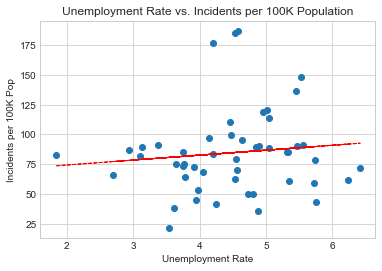

In [85]:
#unemployment rate vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Unemployment Rate"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Unemployment Rate vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)
sns.set_style("whitegrid")


# Save 
plt.grid(True)
fig.savefig("UnemploymentRate.png")



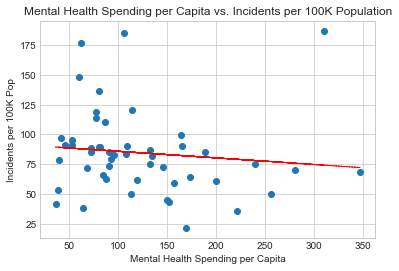

In [86]:
#mental health spending per capita vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["expenditure_per_capita"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Mental Health Spending per Capita")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Mental Health Spending per Capita vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("MentalHealth.png")

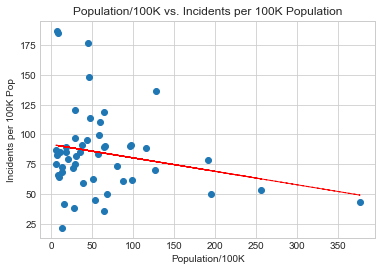

In [87]:
#population vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Population"]/100000)
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Population/100K")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Population/100K vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("Populationper100K.png")

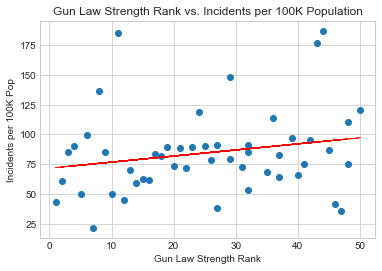

In [88]:
#gun law strength vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["gun law strengh (rank)"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Gun Law Strength Rank")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Gun Law Strength Rank vs. Incidents per 100K Population")


ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("GunLawStrengthRank.png")

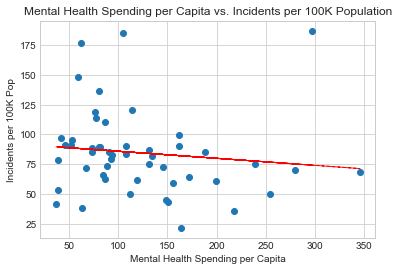

In [89]:
#mental health spending vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["tota_expenditure"]/gun_census_deaths["Population"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Mental Health Spending per Capita")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Mental Health Spending per Capita vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("MentalHealthSpendingperCapita.png")

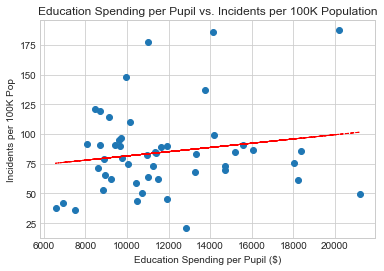

In [90]:
#education spending per pupil vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["total_per_pupil"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Education Spending per Pupil ($)")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Education Spending per Pupil vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("EducationSpendingperPupil.png")

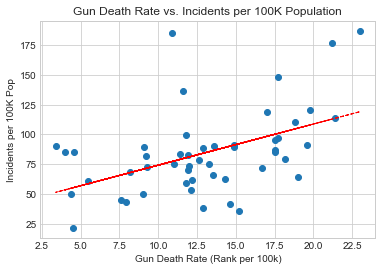

In [91]:
#gun death rate (rank)
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["gun death rate (rank per 100k)"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Gun Death Rate (Rank per 100k)")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Gun Death Rate vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("GunDeathRateRank.png")

In [92]:
gun_census_deaths_disp = gun_census_deaths[["State_Name","Number of Incidents","Population","Norm Incidents","Pop in 100k"]]

gun_census_deaths_disp1=gun_census_deaths_disp.sort_values("Norm Incidents",ascending=False)

gun_census_deaths_disp1.head()

,State_Name,Number of Incidents,Population,Norm Incidents,Pop in 100k
1,Alaska,1349,720316.0,187.278916,7.20316
7,Delaware,1685,908446.0,185.481581,9.08446
17,Louisiana,8103,4567968.0,177.387407,45.67968
39,South Carolina,6939,4679602.0,148.281841,46.79602
12,Illinois,17556,12848554.0,136.637944,128.48554


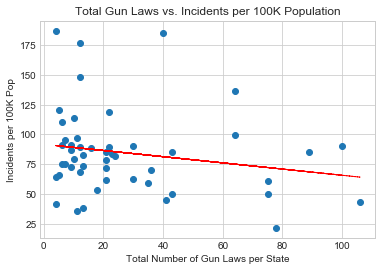

In [93]:
#total gun laws per state vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["lawtotal"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Total Number of Gun Laws per State")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Total Gun Laws vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("TotalNumberGunLaws.png")

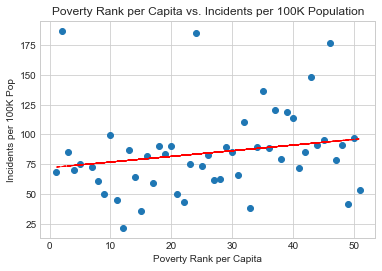

In [94]:
#poverty_per_capita_rank vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["poverty_per_capita_rank"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Poverty Rank per Capita")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Poverty Rank per Capita vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("PovertyRank.png")

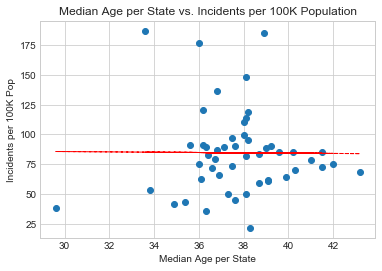

In [95]:
#Median Age per state vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Median Age"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Median Age per State")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Median Age per State vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("MedianAge.png")

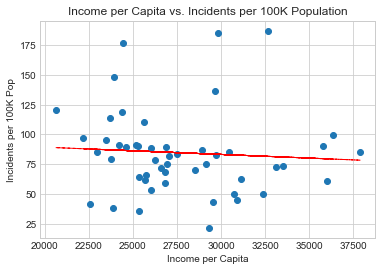

In [96]:
#Per Capita Income per state vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Per Capita Income"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Income per Capita")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Income per Capita vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("Income.png")

In [97]:
# Store filepath in a variable
gun_onwership_by_state = "Resources/GunsByState.xlsx"

In [98]:
gun_ownership_by_state_df = pd.read_excel(gun_onwership_by_state)

gun_ownership_by_state_df.head()

,State_Name,Gun ownership rates
0,Alabama,48.9
1,Alaska,61.7
2,Arizona,32.3
3,Arkansas,57.9
4,California,20.1


In [99]:
# Merge gun_census with gun ownership by state
gun_census_deaths_owner = gun_census_deaths.merge(gun_ownership_by_state_df, how = 'outer', on = 'State_Name')
gun_census_deaths_owner.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Number of Deaths,Number of Incidents,Pop in 100k,Norm Incidents,Gun ownership rates
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,43253.0,23680.0,870631.0,18.140878,5.040968,1880,5471,47.99277,113.996337,48.9
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,70760.0,32651.0,69514.0,9.650487,4.572854,267,1349,7.20316,187.278916,61.7
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,49774.0,25358.0,1131901.0,17.468409,4.882323,1094,2328,64.79703,35.927573,32.3
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,40768.0,22170.0,547328.0,18.658682,4.132961,773,2842,29.33369,96.885186,57.9
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,61094.0,29527.0,5885417.0,15.628107,5.758662,5562,16306,376.59181,43.298870,20.1


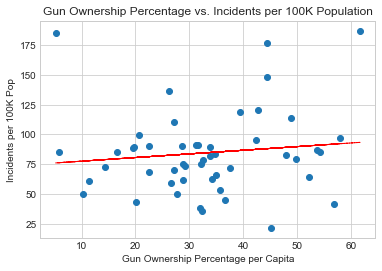

In [100]:
#Gun ownership rates per state vs incidents per 100k
gun_census_deaths_owner = gun_census_deaths_owner.dropna()
x_axis = np.array(gun_census_deaths_owner["Gun ownership rates"])
y_axis = gun_census_deaths_owner["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Gun Ownership Percentage per Capita")
ax.set_ylabel("Incidents per 100K Pop")
ax.set_title("Gun Ownership Percentage vs. Incidents per 100K Population")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("GunOwnershipPercentage.png")

In [101]:
# Store filepath in a variable
police_spending_by_state = "Resources/PoliceExpenditureByState.xlsx"

In [102]:
police_spending_by_state_df = pd.read_excel(police_spending_by_state)

police_spending_by_state_df.head()

,State_Name,PoliceExpenditurePerCapita
0,Alabama,38.15
1,Alaska,219.55
2,Arizona,36.51
3,Arkansas,39.65
4,California,45.92


In [103]:
# Merge gun_census with gun ownership by state
gun_census_deaths_owner_police = gun_census_deaths_owner.merge(police_spending_by_state_df, how = 'outer', on = 'State_Name')
gun_census_deaths_owner_police.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade,...,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Number of Deaths,Number of Incidents,Pop in 100k,Norm Incidents,Gun ownership rates,PoliceExpenditurePerCapita
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,F,...,23680.0,870631.0,18.140878,5.040968,1880,5471,47.99277,113.996337,48.9,38.15
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,F,...,32651.0,69514.0,9.650487,4.572854,267,1349,7.20316,187.278916,61.7,219.55
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,F,...,25358.0,1131901.0,17.468409,4.882323,1094,2328,64.79703,35.927573,32.3,36.51
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,F,...,22170.0,547328.0,18.658682,4.132961,773,2842,29.33369,96.885186,57.9,39.65
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,A,...,29527.0,5885417.0,15.628107,5.758662,5562,16306,376.59181,43.298870,20.1,45.92


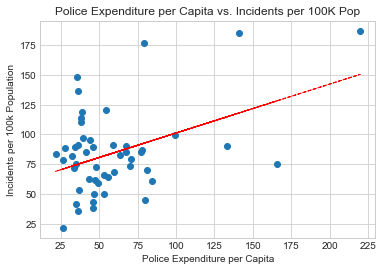

In [104]:
#Police expenditure per capita per state vs incidents per 100k per state
gun_census_deaths_owner_police = gun_census_deaths_owner_police.dropna()
x_axis = np.array(gun_census_deaths_owner_police["PoliceExpenditurePerCapita"])
y_axis = gun_census_deaths_owner_police["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Police Expenditure per Capita")
ax.set_ylabel("Incidents per 100k Population")
ax.set_title("Police Expenditure per Capita vs. Incidents per 100K Pop")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r', linestyle = 'dashed', linewidth = 1)

plt.grid(True)
fig.savefig("PoliceExpenditure.png")

In [105]:
# per100k = Take state population and divide by 100000
# Take incidents/deaths and divide that by per100k
per100k = gun_census_deaths["Population"]/100000
norm_deaths = gun_census_deaths["Number of Deaths"]/per100k
norm_incidents = gun_census_deaths["Number of Incidents"]/per100k

In [106]:
# View all columns in our dataframe
gun_census_deaths.columns

Index(['State_Name', 'year', 'lawtotal', 'total_spending', 'total_per_pupil',
       'gun law strengh (rank)', 'grade (2017)', 'gun death rate (rank)',
       'gun death rate (rank per 100k)', 'Letter_Grade', 'tota_expenditure',
       'expenditure_per_capita', 'per_capita_rank',
       'poverty_per_capita_expenditure', 'poverty_per_capita_rank',
       'Population', 'Median Age', 'Household Income', 'Per Capita Income',
       'Poverty Count', 'Poverty Rate', 'Unemployment Rate',
       'Number of Deaths', 'Number of Incidents', 'Pop in 100k',
       'Norm Incidents'],
      dtype='object')

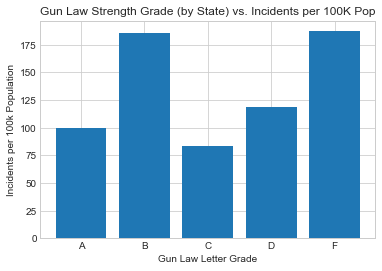

In [107]:
# Create a bar graph to show the letter grade vs the number of incidents/population
x_axis = gun_census_deaths["Letter_Grade"]
y_axis = gun_census_deaths["Number of Incidents"] / gun_census_deaths["Population"] * 100000
plt.ylabel("Incidents per 100k Population")
plt.xlabel("Gun Law Letter Grade")
plt.title("Gun Law Strength Grade (by State) vs. Incidents per 100K Pop")
plt.bar(x_axis, y_axis)
sns.set_style("whitegrid")
plt.savefig("Grade_Incidents")

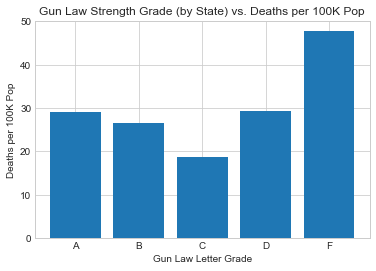

In [108]:
# Create a bar graph to show the letter grade vs the number of deaths/population
x_axis = gun_census_deaths["Letter_Grade"]
pop = gun_census_deaths["Population"]/100000
y_axis = gun_census_deaths["Number of Deaths"] / pop
plt.xlabel("Gun Law Letter Grade")
plt.ylabel("Deaths per 100K Pop")
plt.title("Gun Law Strength Grade (by State) vs. Deaths per 100K Pop")
plt.bar(x_axis, y_axis)
sns.set_style("whitegrid")
plt.savefig("Grade_Deaths")